In [2]:
import pandas
import csv
import matplotlib.pyplot as plt

#preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from numpy import mean
from numpy import std
import numpy as np
seed = 7
np.random.seed(seed)

# modelos
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import StackingClassifier

#guardar modelos
from sklearn.externals import joblib

#evaluacion
from sklearn.metrics import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Una vez preprocesado el dataset se debe ejecutar Training_Test_Data.py para crear 10 datasets para entrenamientos y test de cada modelo.

# Carga de datos

In [5]:
train_folds  = []
test_folds = []
for i in range(10):
    train = pandas.read_csv("train_"+ str(i) + ".csv", decimal=".")
    col_mask=train.isnull().any(axis=0) 
    row_mask=train.isnull().any(axis=1)
    train_folds.append(train.loc[-row_mask,-col_mask])
    test = pandas.read_csv("test_"+ str(i) + ".csv", decimal=".")
    col_mask=test.isnull().any(axis=0) 
    row_mask=test.isnull().any(axis=1)
    test_folds.append(test.loc[-row_mask,-col_mask])

# Carga de modelos para comparar su rendimiento

# Cost-sensitive  RANDOM FOREST

In [6]:
model_RF = []
recall_RF = []
for i in range(len(train_folds)):
    model = joblib.load('RF' + str(i) + '.pkl')
    model_RF.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    recall = recall_score(test_folds[i]["hospital_death"], predict, average='binary')
    print('Recall %d fold: %f' % (i , recall))
    recall_RF.append(recall)
print("mean Recall : " + str(mean(recall_RF)))

Recall 0 fold: 0.711111
Recall 1 fold: 0.773585
Recall 2 fold: 0.801054
Recall 3 fold: 0.843324
Recall 4 fold: 0.797315
Recall 5 fold: 0.755464
Recall 6 fold: 0.776623
Recall 7 fold: 0.755618
Recall 8 fold: 0.723404
Recall 9 fold: 0.794667
mean Recall : 0.7732166479151221


# Cost-sensitive SUPPORT VECTOR MACHINE

In [7]:
model_SVM = []
recall_SVM = []
for i in range(len(train_folds)):
    model = joblib.load('SVM' + str(i) + '.pkl')
    model_SVM.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    recall = recall_score(test_folds[i]["hospital_death"], predict, average='binary')
    print('Recall %d fold: %f' % (i , recall))
    recall_SVM.append(recall)
print("mean Recall : " + str(mean(recall_SVM)))

Recall 0 fold: 0.515278
Recall 1 fold: 0.715633
Recall 2 fold: 0.816864
Recall 3 fold: 0.816076
Recall 4 fold: 0.786577
Recall 5 fold: 0.771858
Recall 6 fold: 0.761039
Recall 7 fold: 0.710674
Recall 8 fold: 0.609043
Recall 9 fold: 0.718667
mean Recall : 0.7221709233267274


# Cost-sensitive  LOGISTIC REGRESSION

In [8]:
model_LR = []
recall_LR = []

model = LogisticRegression(solver='lbfgs', class_weight='balanced')
for i in range(len(train_folds)):
    model = joblib.load('LR' + str(i) + '.pkl')
    model_LR.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    recall = recall_score(test_folds[i]["hospital_death"], predict, average='binary')
    print('Recall %d fold: %f' % (i , recall))
    recall_LR.append(recall)
print("mean Recall : " + str(mean(recall_LR)))

Recall 0 fold: 0.650000
Recall 1 fold: 0.731806
Recall 2 fold: 0.803689
Recall 3 fold: 0.782016
Recall 4 fold: 0.785235
Recall 5 fold: 0.707650
Recall 6 fold: 0.723377
Recall 7 fold: 0.682584
Recall 8 fold: 0.631649
Recall 9 fold: 0.766667
mean Recall : 0.7264673011680937


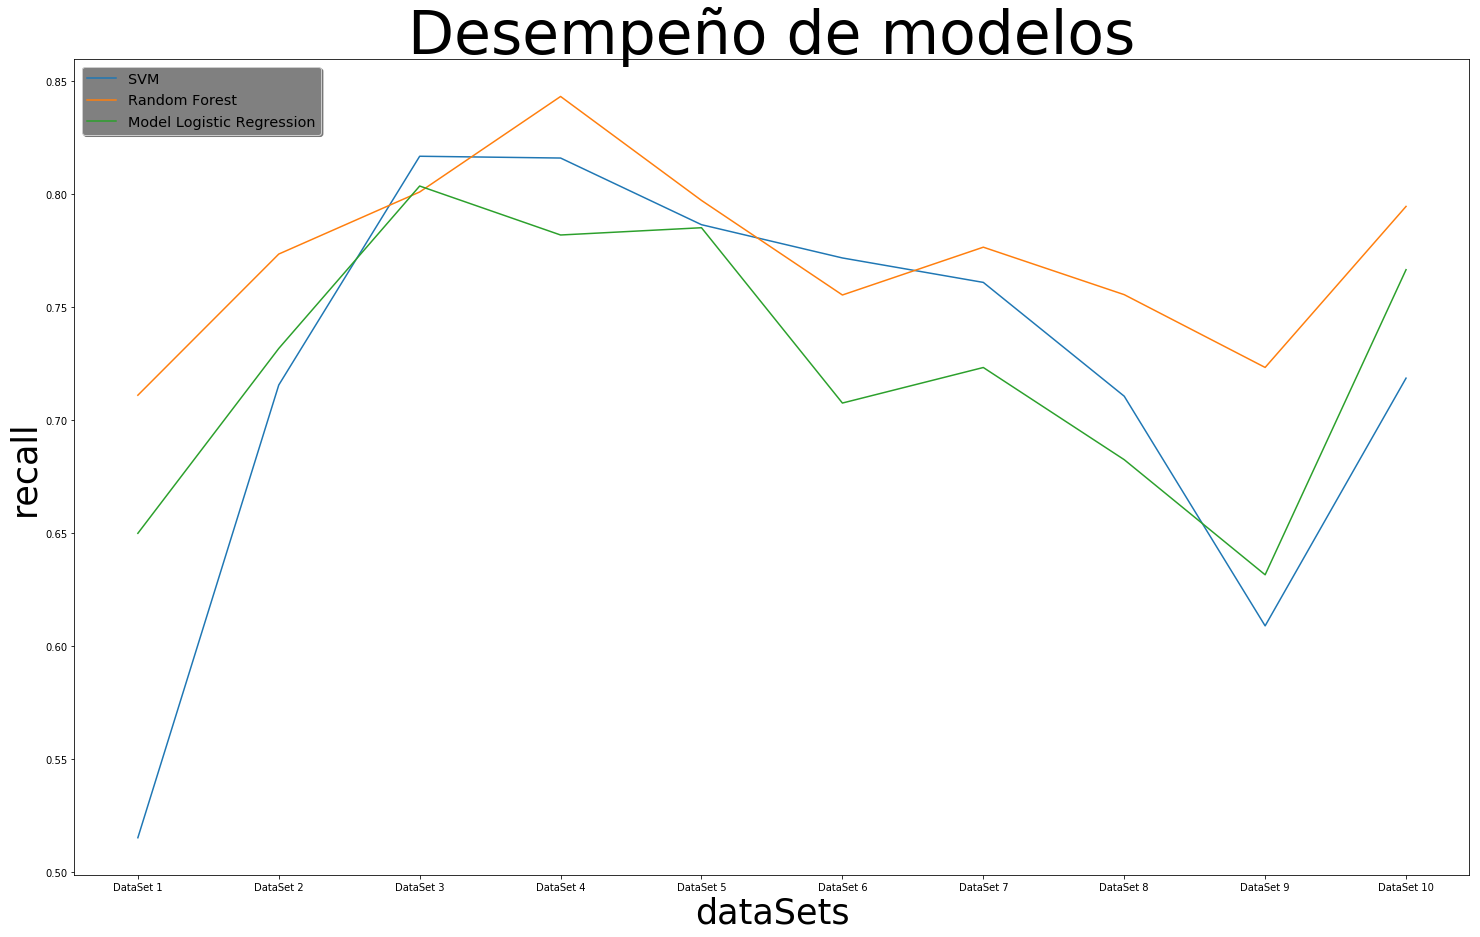

In [20]:
plt.rcParams['figure.figsize'] = [25, 15]
x = ["DataSet 1", "DataSet 2", "DataSet 3", "DataSet 4", "DataSet 5", "DataSet 6", "DataSet 7", "DataSet 8", "DataSet 9", "DataSet 10"]     
fig, ax = plt.subplots()
ax.set_ylabel('recall', fontsize=35)
ax.set_xlabel('dataSets', fontsize=35)
ax.set_title('Desempeño de modelos', fontsize=60)
ax.plot(x, recall_SVM, label='SVM')
ax.plot(x, recall_RF, label='Random Forest')   
ax.plot(x, recall_LR, label='Model Logistic Regression')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('gray')
plt.show()